In [9]:
import pandas as pd
import glob
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import metapredict as meta
from statsmodels.nonparametric.smoothers_lowess import lowess
import warnings
warnings.filterwarnings('ignore')
sns.set_context('talk')
from matplotlib.colors import LogNorm


In [3]:
zoonomia_color = "mediumblue"
vertebs_color = "darkorange"

## Zoonomia vs 100 vertebrates plots

### 1. Full CDS of TFs

In [4]:
zoonomia_cds = pd.read_csv("../soto_analysis/raw_files/zoonomia_all_TF_cds.bed", sep = "\t", header = None, low_memory = False)
zoonomia_cds = zoonomia_cds.rename(columns = {3: "zoonomia_PhyloP"})
zoonomia_cds

,0,1,2,zoonomia_PhyloP
0,3,142005441,142005442,6.299
1,3,142005442,142005443,6.324
2,3,142005443,142005444,6.324
3,3,142005444,142005445,6.324
4,3,142005445,142005446,8.746
...,...,...,...,...
2751585,19,7075739,7075740,-0.412
2751586,19,7075740,7075741,1.754
2751587,19,7075741,7075742,0.061
2751588,19,7075742,7075743,2.618


In [5]:
verteb_cds = pd.read_csv("../soto_analysis/raw_files/100_verteb_all_TF_cds.bed", sep = "\t", header = None, low_memory = False)
verteb_cds = verteb_cds.rename(columns = {3: "100_verteb_PhyloP"})
verteb_cds

,0,1,2,100_verteb_PhyloP
0,3,186081046,186081047,5.524440
1,3,186081047,186081048,2.084630
2,3,186081048,186081049,4.910190
3,3,186081049,186081050,7.735750
4,3,186081050,186081051,4.418790
...,...,...,...,...
2751585,19,3573343,3573344,1.142580
2751586,19,3573344,3573345,0.177819
2751587,19,3573345,3573346,0.623094
2751588,19,3573346,3573347,-0.044819


In [6]:
merged = pd.merge(zoonomia_cds, verteb_cds, on = [0, 1, 2])
merged

,0,1,2,zoonomia_PhyloP,100_verteb_PhyloP
0,3,142005441,142005442,6.299,5.543820
1,3,142005442,142005443,6.324,4.722690
2,3,142005443,142005444,6.324,4.722690
3,3,142005444,142005445,6.324,4.722690
4,3,142005445,142005446,8.746,6.000000
...,...,...,...,...,...
2751585,19,7075739,7075740,-0.412,-0.518126
2751586,19,7075740,7075741,1.754,0.892677
2751587,19,7075741,7075742,0.061,-0.719669
2751588,19,7075742,7075743,2.618,0.623953


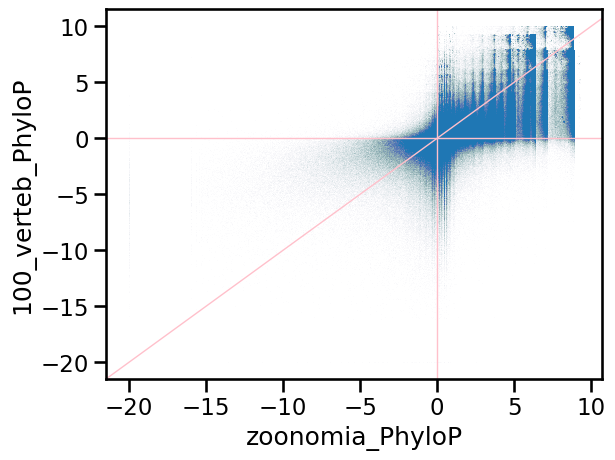

In [7]:
sns.scatterplot(data = merged, 
                x = "zoonomia_PhyloP", y = "100_verteb_PhyloP",
               s = 0.5, edgecolor = None, alpha = 0.01);
plt.axline((0, 0), lw = 1, slope=1, color='pink')
plt.axvline(0, lw = 1, color = "pink")
plt.axhline(0, lw = 1, color = "pink")

<Figure size 1200x1200 with 0 Axes>

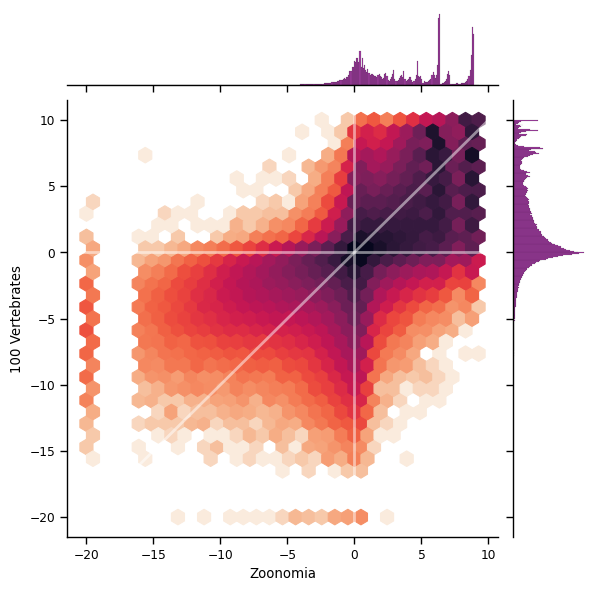

In [62]:
# Create a hexbin plot

sns.set_context('paper')
plt.figure(figsize = (4,4), dpi = 300)
g = sns.jointplot(data = merged, 
                x = "zoonomia_PhyloP", y = "100_verteb_PhyloP", 
              kind = "hex", 
              norm = LogNorm(),
             cmap = "rocket_r", marginal_kws={'color': 'purple', 'stat' : 'density'}, gridsize=30
)

plt.axline((0, 0), lw = 2, slope=1, color = "white", alpha = 0.5 )
plt.axvline(0, lw = 2, color = "white", alpha = 0.5 )
plt.axhline(0, lw = 2, color = "white", alpha = 0.5 )
plt.xlabel("Zoonomia")
plt.ylabel("100 Vertebrates");

# cbar = g.fig.colorbar(g.ax_joint.collections[0], ax=g.fig.axes, location='right', fraction=0.046, pad=0.04)
# plt.colorbar(im,fraction=0.046, pad=0.04)

# # Set colorbar label
# cbar.set_label('Counts')

# # Adjust layout to fit the colorbar without affecting plot size
# plt.subplots_adjust(right=0.85)  # Adjust the right margin to make room for the colorbar

# Show the plot
plt.show()

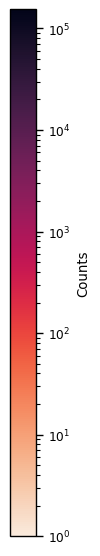

In [56]:
# Example data (replace this with your actual dataset)
# merged = sns.load_dataset("tips")

g = sns.jointplot(data = merged, 
                x = "zoonomia_PhyloP", y = "100_verteb_PhyloP", 
              kind = "hex", 
              norm = LogNorm(),
             cmap = "rocket_r", marginal_kws={'color': 'purple', 'stat' : 'density'}, gridsize=30
)

# Hide all other elements (the actual plot) by turning off the axes and figure
for ax in g.fig.axes:
    ax.set_visible(False)

# Create the colorbar, but only display the colorbar itself
cbar = g.fig.colorbar(g.ax_joint.collections[0], ax=g.fig.axes, location='right', pad=0.01)

# Set colorbar label
cbar.set_label('Counts')


# Display the colorbar only
plt.show()


In [65]:
merged

,0,1,2,zoonomia_PhyloP,100_verteb_PhyloP
0,3,142005441,142005442,6.299,5.543820
1,3,142005442,142005443,6.324,4.722690
2,3,142005443,142005444,6.324,4.722690
3,3,142005444,142005445,6.324,4.722690
4,3,142005445,142005446,8.746,6.000000
...,...,...,...,...,...
2751585,19,7075739,7075740,-0.412,-0.518126
2751586,19,7075740,7075741,1.754,0.892677
2751587,19,7075741,7075742,0.061,-0.719669
2751588,19,7075742,7075743,2.618,0.623953


In [92]:
# Who is on the left?
zoonomia_accel = merged[(merged["zoonomia_PhyloP"] == -20)]
zoonomia_accel[0] = zoonomia_accel[0].astype(str)
zoonomia_accel[1] = zoonomia_accel[1].astype(str)
zoonomia_accel[2] = zoonomia_accel[2].astype(str)
zoonomia_accel

,0,1,2,zoonomia_PhyloP,100_verteb_PhyloP
3491,19,56814193,56814194,-20.0,-5.65413
3512,19,56814214,56814215,-20.0,-9.38800
3527,19,56814229,56814230,-20.0,-8.55825
3554,19,56814256,56814257,-20.0,-6.76046
5492,19,56816194,56816195,-20.0,-8.52700
...,...,...,...,...,...
2701545,4,148154632,148154633,-20.0,-4.43176
2701665,4,148154752,148154753,-20.0,-5.05936
2736437,19,41850577,41850578,-20.0,3.84401
2738499,16,85911633,85911634,-20.0,-4.68497


In [93]:
cds_zoonomia = pd.concat([pd.read_csv(_, sep = "\t", header = None) for _ in glob.glob("../soto_analysis/outputs/mutations/cds_zoonomia_all_TF_cds/ENST*")])
cds_zoonomia[0] = cds_zoonomia[0].astype(str)
cds_zoonomia[1] = cds_zoonomia[1].astype(str)
cds_zoonomia[2] = cds_zoonomia[2].astype(str)
cds_zoonomia

,0,1,2,3,4,5,6,7,8
0,2,27149134,27149135,ENST00000296096,1,2,27149134,27149135,4.624
1,2,27149135,27149136,ENST00000296096,1,2,27149135,27149136,6.891
2,2,27149136,27149137,ENST00000296096,1,2,27149136,27149137,1.666
3,2,27149137,27149138,ENST00000296096,1,2,27149137,27149138,5.833
4,2,27149138,27149139,ENST00000296096,1,2,27149138,27149139,-0.157
...,...,...,...,...,...,...,...,...,...
3850,16,49822681,49822682,ENST00000561648,-1,16,49822681,49822682,0.452
3851,16,49822682,49822683,ENST00000561648,-1,16,49822682,49822683,-0.104
3852,16,49822683,49822684,ENST00000561648,-1,16,49822683,49822684,-0.824
3853,16,49822684,49822685,ENST00000561648,-1,16,49822684,49822685,0.588


In [94]:
zoonomia_accel_w_ENST = pd.merge(zoonomia_accel, cds_zoonomia, how = "left", on = [0, 1, 2])
zoonomia_accel_w_ENST

,0,1,2,zoonomia_PhyloP,100_verteb_PhyloP,3,4,5,6,7,8
0,19,56814193,56814194,-20.0,-5.65413,ENST00000599577,-1,19,56814193,56814194,-20.0
1,19,56814214,56814215,-20.0,-9.38800,ENST00000599577,-1,19,56814214,56814215,-20.0
2,19,56814229,56814230,-20.0,-8.55825,ENST00000599577,-1,19,56814229,56814230,-20.0
3,19,56814256,56814257,-20.0,-6.76046,ENST00000599577,-1,19,56814256,56814257,-20.0
4,19,56816194,56816195,-20.0,-8.52700,ENST00000599577,-1,19,56816194,56816195,-20.0
...,...,...,...,...,...,...,...,...,...,...,...
495,4,148154632,148154633,-20.0,-4.43176,ENST00000344721,-1,4,148154632,148154633,-20.0
496,4,148154752,148154753,-20.0,-5.05936,ENST00000344721,-1,4,148154752,148154753,-20.0
497,19,41850577,41850578,-20.0,3.84401,ENST00000269945,1,19,41850577,41850578,-20.0
498,16,85911633,85911634,-20.0,-4.68497,ENST00000268638,1,16,85911633,85911634,-20.0


In [95]:
len(set(zoonomia_accel_w_ENST[3]))

284

In [96]:
zoonomia_accel_w_ENST[3].value_counts()[:15]

3
ENST00000379177    13
ENST00000418929    10
ENST00000641206     9
ENST00000340748     8
ENST00000370978     8
ENST00000298532     7
ENST00000597229     6
ENST00000263620     6
ENST00000599577     5
ENST00000292579     5
ENST00000296682     5
ENST00000565624     5
ENST00000383052     5
ENST00000398665     5
ENST00000262965     5
Name: count, dtype: int64

In [100]:
zoonomia_accel_w_ENST

,0,1,2,zoonomia_PhyloP,100_verteb_PhyloP,3,4,5,6,7,8
0,19,56814193,56814194,-20.0,-5.65413,ENST00000599577,-1,19,56814193,56814194,-20.0
1,19,56814214,56814215,-20.0,-9.38800,ENST00000599577,-1,19,56814214,56814215,-20.0
2,19,56814229,56814230,-20.0,-8.55825,ENST00000599577,-1,19,56814229,56814230,-20.0
3,19,56814256,56814257,-20.0,-6.76046,ENST00000599577,-1,19,56814256,56814257,-20.0
4,19,56816194,56816195,-20.0,-8.52700,ENST00000599577,-1,19,56816194,56816195,-20.0
...,...,...,...,...,...,...,...,...,...,...,...
495,4,148154632,148154633,-20.0,-4.43176,ENST00000344721,-1,4,148154632,148154633,-20.0
496,4,148154752,148154753,-20.0,-5.05936,ENST00000344721,-1,4,148154752,148154753,-20.0
497,19,41850577,41850578,-20.0,3.84401,ENST00000269945,1,19,41850577,41850578,-20.0
498,16,85911633,85911634,-20.0,-4.68497,ENST00000268638,1,16,85911633,85911634,-20.0


In [121]:
TF_enst_mappings = pd.read_csv("../output/TFs_with_ENST.csv", index_col = 0)
TF_enst_mappings = TF_enst_mappings[["uniprotID", "ENST"]]
TF_enst_mappings["ENST"] = TF_enst_mappings["ENST"].str.split(".").str[0]
TF_enst_mappings

,uniprotID,ENST
0,A0A087WUV0,ENST00000425953
1,A0AVK6,ENST00000250024
2,A1YPR0,ENST00000535628
3,A2RRD8,ENST00000391781
4,A2RU54,ENST00000339992
...,...,...
2127,Q9Y692,ENST00000294409
2128,Q9Y6Q3,ENST00000374227
2129,Q9Y6Q9,ENST00000371998
2130,Q9Y6X0,ENST00000649279


In [132]:
TF_enst_mappings[["uniprotID"]].to_csv("../data/TF_uniprotIDs.csv", index = None, header = None, sep = "\t")

In [140]:
gene_names = pd.read_csv("../data/TF_uniprotIDs_to_gene_names.tsv", sep = "\t")
gene_names = gene_names.rename(columns = {"From" : "uniprotID"})
gene_names["Gene"] = gene_names["Gene Names"].str.split(" ").str[0]
gene_names = gene_names[["uniprotID", "Gene"]]
gene_names

,uniprotID,Gene
0,A0A087WUV0,ZNF892
1,A0AVK6,E2F8
2,A0PJY2,FEZF1
3,A1A519,FAM170A
4,A1YPR0,ZBTB7C
...,...,...
1585,Q9Y6Q9,NCOA3
1586,Q9Y6R6,ZNF780B
1587,Q9Y6X0,SETBP1
1588,Q9Y6X8,ZHX2


In [141]:
TF_enst_mappings = pd.merge(TF_enst_mappings, gene_names, how = "left")
TF_enst_mappings

,uniprotID,ENST,Gene
0,A0A087WUV0,ENST00000425953,ZNF892
1,A0AVK6,ENST00000250024,E2F8
2,A1YPR0,ENST00000535628,ZBTB7C
3,A2RRD8,ENST00000391781,ZNF320
4,A2RU54,ENST00000339992,HMX2
...,...,...,...
1585,Q9Y692,ENST00000294409,GMEB1
1586,Q9Y6Q3,ENST00000374227,ZFP37
1587,Q9Y6Q9,ENST00000371998,NCOA3
1588,Q9Y6X0,ENST00000649279,SETBP1


In [146]:
# uniprotIDs of TFs w -20 accel pos
TF_enst_mappings[TF_enst_mappings["ENST"].isin(zoonomia_accel_w_ENST[3])][["Gene"]].drop_duplicates().to_csv("../output/TFs_w_-20_PhyloP.txt", header = None, index = None)
TF_enst_mappings[TF_enst_mappings["ENST"].isin(zoonomia_accel_w_ENST[3])][["Gene"]].drop_duplicates()

,Gene
2,ZBTB7C
9,ZSCAN5C
14,ZSCAN5B
23,DRGX
26,ZNF891
...,...
1560,FOXA2
1561,MYRF
1571,TBX22
1583,NR2E3


In [148]:
# uniprotIDs of TFs w/o -20 accel pos
TF_enst_mappings[["Gene"]].drop_duplicates().to_csv("../output/all_TFs_gene_names.txt", header = None, index = None)
TF_enst_mappings[["Gene"]].drop_duplicates()

,Gene
0,ZNF892
1,E2F8
2,ZBTB7C
3,ZNF320
4,HMX2
...,...
1585,GMEB1
1586,ZFP37
1587,NCOA3
1588,SETBP1


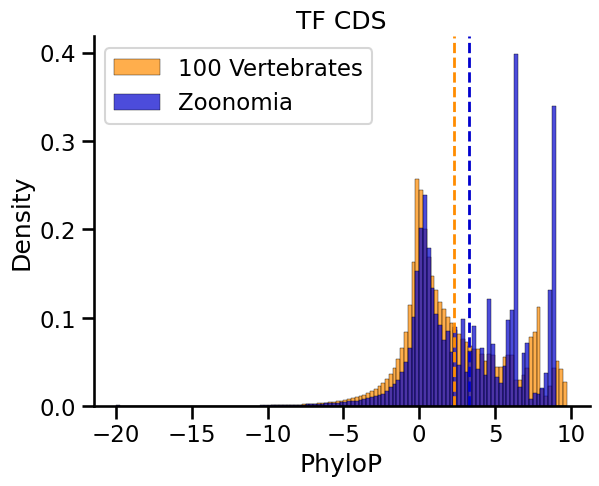

In [184]:
bins = np.arange(-20, 10, 0.25)

plt.axvline(np.mean(merged["100_verteb_PhyloP"]), color = vertebs_color, ls = "--", lw = 2)
plt.axvline(np.mean(merged["zoonomia_PhyloP"]), color = zoonomia_color, ls = "--", lw = 2)

sns.histplot(merged["100_verteb_PhyloP"], 
             bins = bins, 
             label = "100 Vertebrates", 
             stat = "density",
            color = vertebs_color, alpha = 0.7)

sns.histplot(merged["zoonomia_PhyloP"], 
             bins = bins, 
             label = "Zoonomia", 
             stat = "density",
            color = zoonomia_color, alpha = 0.7)
sns.despine()
plt.legend()
plt.xlabel("PhyloP")
plt.title("TF CDS");